# Representative State Matrices 

## preprocess and packages

In [1]:
import numpy as np 
import matplotlib .pyplot as plt 
import pandas as pd

In [2]:
df = pd.read_csv("dataset\energy_dataset.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

In [4]:
N = 8

In [5]:
# Cargar datos de ejemplo
def load_energy_data():

    return df


## processing function to create a matrix from X num_states (in order to quantify the data) and plot their transition matrix


In [6]:
import numpy as np
def create_transition_matrix(series, num_states):
    # 1. Discretizar la serie en 'num_states' estados
    bins = np.linspace(min(series), max(series), num_states + 1)
    states = np.digitize(series, bins) - 1  # Restar 1 para que los índices comiencen en 0

    # Asegurarse de que los estados estén en el rango [0, num_states-1]
    states = np.clip(states, 0, num_states - 1)

    # 2. Crear matriz de transición
    trans_matrix = np.zeros((num_states, num_states), dtype=int)
    for i in range(len(states) - 1):
        from_state = states[i]
        to_state = states[i + 1]
        trans_matrix[from_state, to_state] += 1

    # 3. Normalizar filas para obtener probabilidades
    row_sums = trans_matrix.sum(axis=1, keepdims=True)
    trans_matrix = np.divide(trans_matrix, row_sums, where=row_sums != 0)

    return trans_matrix

## process for first pair 

In [ ]:

# Procesamiento principal
def FirstPar():
    # Cargar datos
    df = load_energy_data()
    
    # Seleccionar serie temporal (cambiar según necesidad)
    series = df['generation solar'].values  # o 'total_load_actual'
    series2= df['total load actual'].values
    
    # Crear matriz de transición 8x8
    trans_matrix = create_transition_matrix(series, num_states=8)
    trans_matrix2 = create_transition_matrix(series2, num_states=8)



    # Compute column sums for each transition matrix
    column_sums_1 = trans_matrix.sum(axis=0)  # Column-wise sum for matrix 1
    column_sums_2 = trans_matrix2.sum(axis=0)  # Column-wise sum for matrix 2

    
    # visualization 

    fig, axes = plt.subplots( 3, 2, figsize = (12,15)) # 3 rows and 2 columns

    #heat map for T1 and T2

    # Heatmap for Transition Matrix 1
    im1 = axes[0, 0].imshow(trans_matrix, cmap="viridis", aspect="auto")
    axes[0, 0].set_title("Transition Matrix 1 Heatmap")
    fig.colorbar(im1, ax=axes[0, 0])
    axes[0, 0].set_xlabel("To State")
    axes[0, 0].set_ylabel("From State")

    # Mostrar valores en las celdas para Transition Matrix 1
    for i in range(trans_matrix.shape[0]):
        for j in range(trans_matrix.shape[1]):
            axes[0, 0].text(j, i, f"{trans_matrix[i, j]:.2f}", 
                            ha="center", va="center", color="white")


    # Bar plot for Column Sums of Transition Matrix 1
    axes[1, 0].bar(range(N), column_sums_1/column_sums_1.sum(axis=0), color="blue", alpha=0.7)
    axes[1, 0].set_title("Column Sums of Transition Matrix 1")
    axes[1, 0].set_xlabel("Column Index")
    axes[1, 0].set_ylabel("Sum")


    # Heatmap for Transition Matrix 2
    im2 = axes[0, 1].imshow(trans_matrix2, cmap="viridis", aspect="auto")
    axes[0, 1].set_title("Transition Matrix 2 Heatmap")
    fig.colorbar(im2, ax=axes[0, 1])
    axes[0, 1].set_xlabel("To State")
    axes[0, 1].set_ylabel("From State")

    # Mostrar valores en las celdas para Transition Matrix 2
    for i in range(trans_matrix2.shape[0]):
        for j in range(trans_matrix2.shape[1]):
            axes[0, 1].text(j, i, f"{trans_matrix2[i, j]:.2f}", 
                            ha="center", va="center", color="white")
        

    # Bar plot for Column Sums of Transition Matrix 2
    axes[1, 1].bar(range(N), column_sums_2/column_sums_2.sum(axis=0), color="green", alpha=0.7)
    axes[1, 1].set_title("Column Sums of Transition Matrix 2")
    axes[1, 1].set_xlabel("Column Index")
    axes[1, 1].set_ylabel("Sum")





    # Compute eigenvalues for each transition matrix
    eigenvalues_1 = np.linalg.eigvals(trans_matrix)
    axes[2, 0].bar(range(len(eigenvalues_1)), eigenvalues_1.real, color="blue", alpha=0.7)
    axes[2, 0].set_title("Eigenvalues of Transition Matrix 1")
    axes[2, 0].set_xlabel("Eigenvalue Index")
    axes[2, 0].set_ylabel("Real Part")

    eigenvalues_2 = np.linalg.eigvals(trans_matrix2)
    axes[2, 1].bar(range(len(eigenvalues_2)), eigenvalues_2.real, color="green", alpha=0.7)
    axes[2, 1].set_title("Eigenvalues of Transition Matrix 2")
    axes[2, 1].set_xlabel("Eigenvalue Index")
    axes[2, 1].set_ylabel("Real Part")

    plt.tight_layout()
    plt.show()



    # Compute joint transition matrix
    joint_matrix = np.dot(trans_matrix, trans_matrix2)  # Matrix multiplication

    # Compute column sums for the joint matrix
    column_sums_joint = joint_matrix.sum(axis=0)

    # Compute eigenvalues for the joint matrix
    eigenvalues_joint = np.linalg.eigvals(joint_matrix)

    # Plot heatmap, column sums, and eigenvalues for the joint matrix
    fig, axes = plt.subplots(3, 1, figsize=(10, 15))  # 3 rows, 1 column

    # Heatmap for Joint Transition Matrix
    im = axes[0].imshow(joint_matrix, cmap="viridis", aspect="auto")
    axes[0].set_title("Joint Transition Matrix Heatmap")
    fig.colorbar(im, ax=axes[0])
    axes[0].set_xlabel("To State")
    axes[0].set_ylabel("From State")

    # Bar plot for Column Sums of Joint Transition Matrix
    axes[1].bar(range(N), column_sums_joint/column_sums_joint.sum(axis=0), color="blue", alpha=0.7)
    axes[1].set_title("Column Sums of Joint Transition Matrix")
    axes[1].set_xlabel("Column Index")
    axes[1].set_ylabel("Sum")

    # Bar plot for Eigenvalues of Joint Transition Matrix
    axes[2].bar(range(len(eigenvalues_joint)), eigenvalues_joint.real, color="green", alpha=0.7)
    axes[2].set_title("Eigenvalues of Joint Transition Matrix")
    axes[2].set_xlabel("Eigenvalue Index")
    axes[2].set_ylabel("Real Part")

    plt.tight_layout()
    plt.show()
    return trans_matrix, trans_matrix2, joint_matrix, column_sums_1, column_sums_2, column_sums_joint, eigenvalues_1, eigenvalues_2, eigenvalues_joint
    

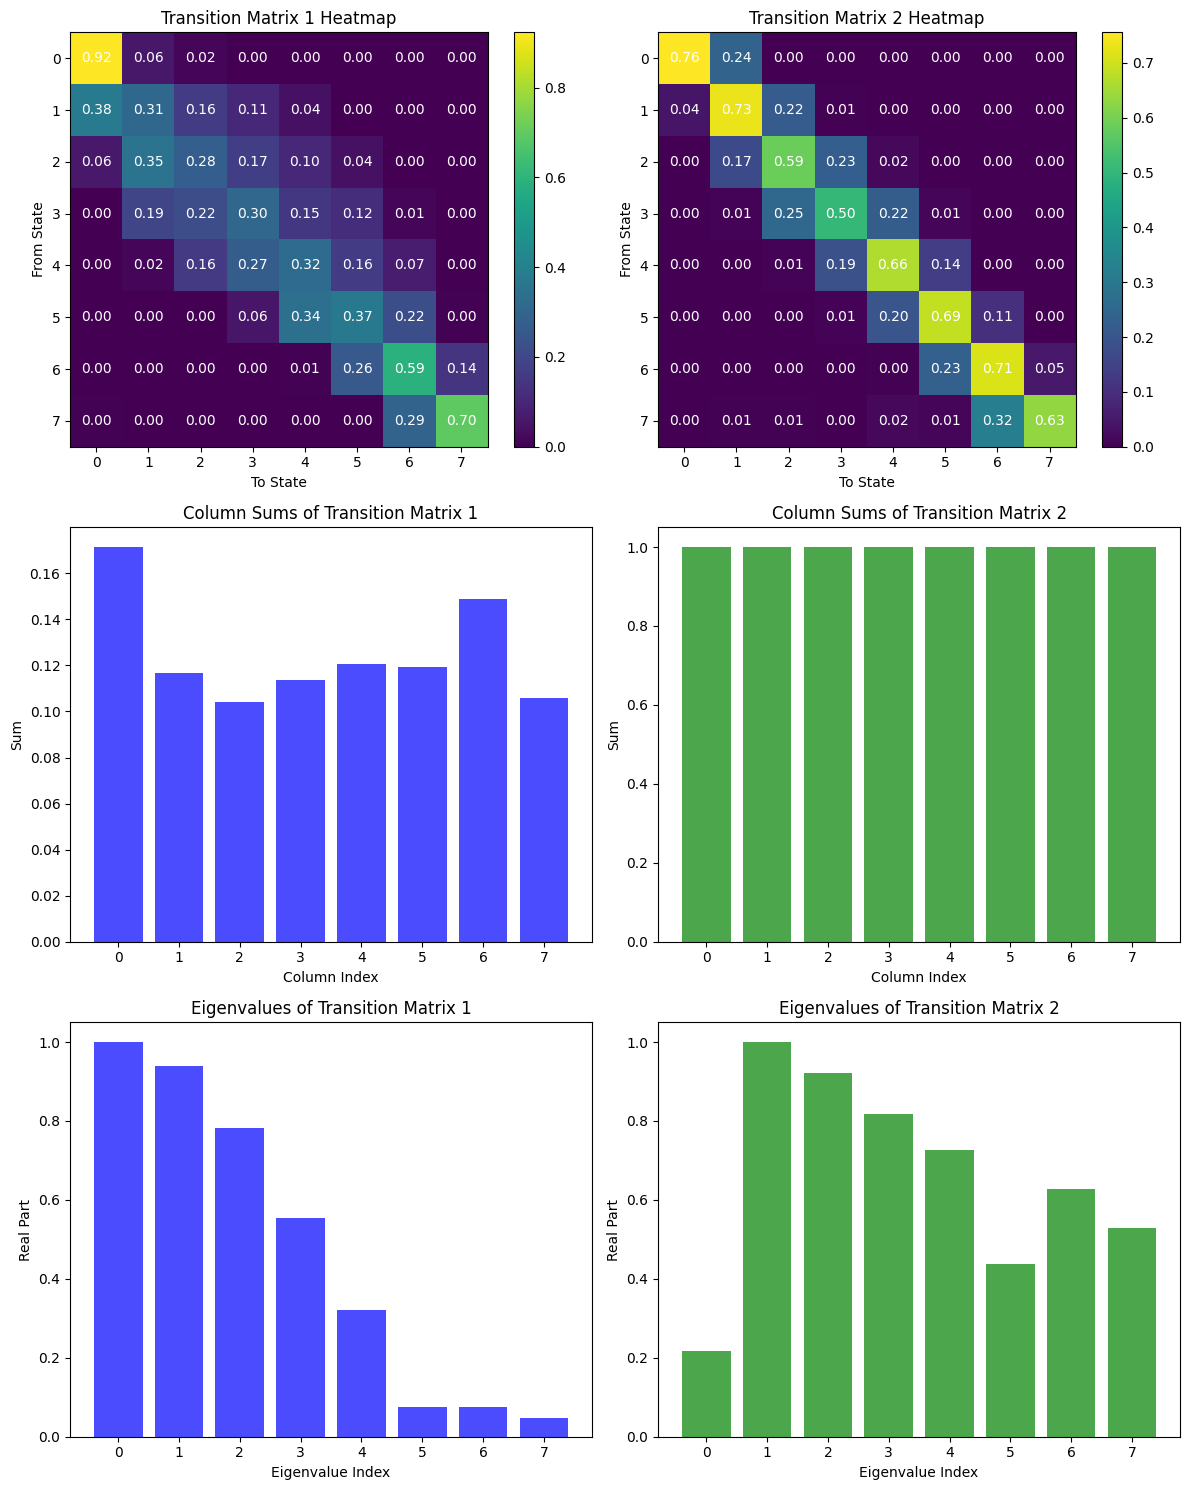

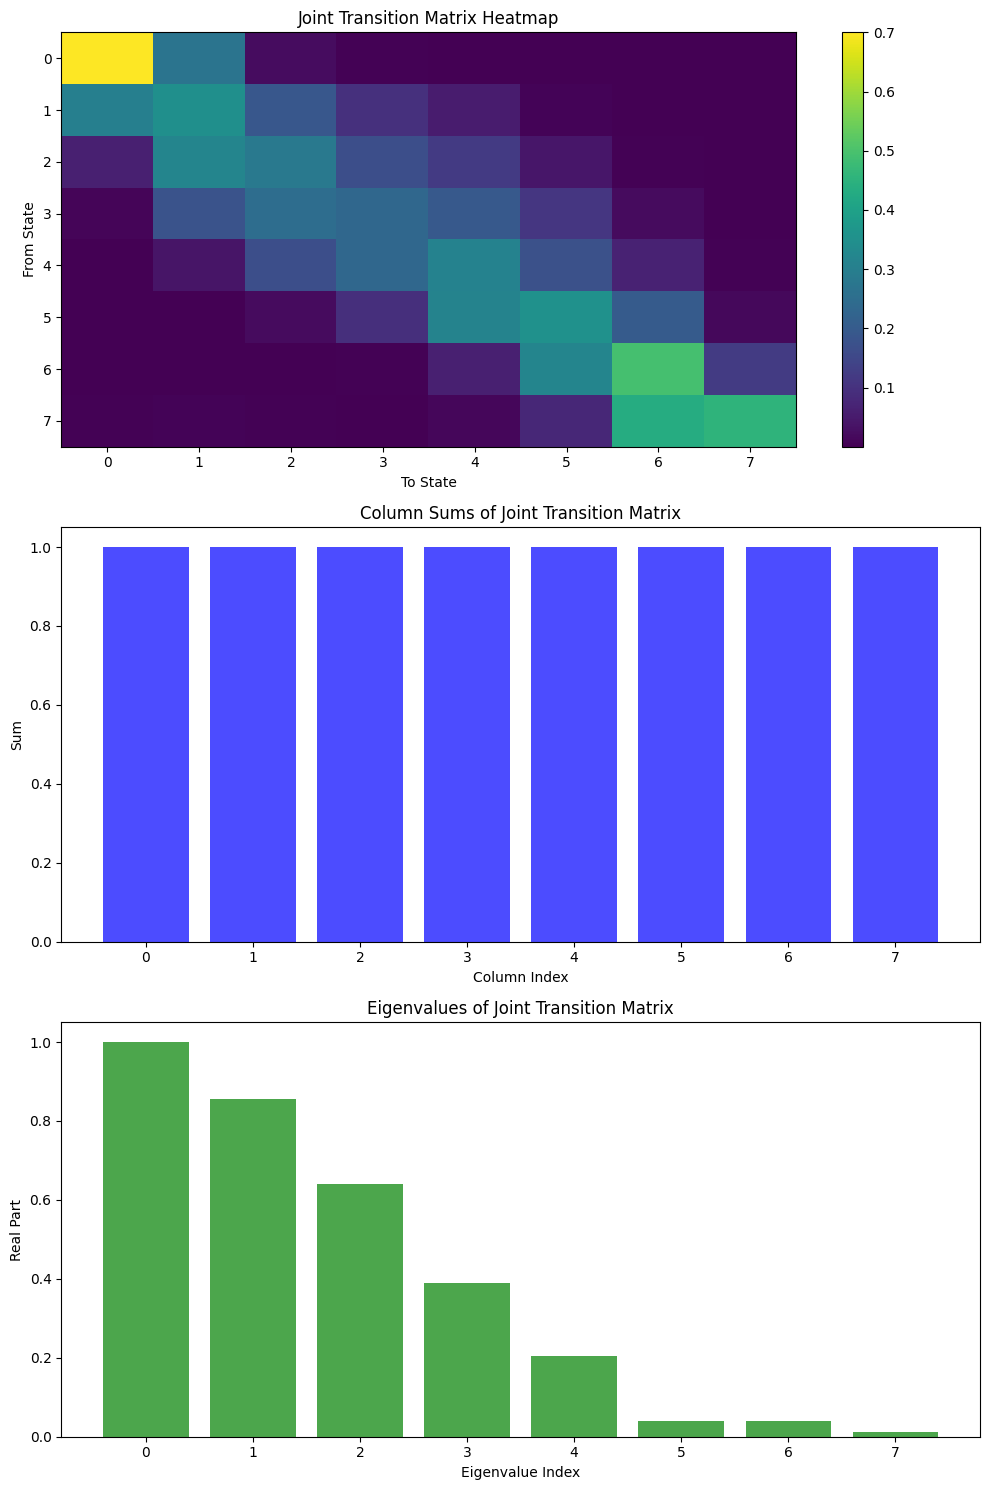

In [16]:

if __name__ == "__main__":

    join_matrixFirstCase = FirstPar()[2]

## process for second pair 

In [9]:

# Procesamiento principal
def secondPair():
    # Cargar datos
    df = load_energy_data()
    
    # Seleccionar serie temporal (cambiar según necesidad)
    series3 = df['generation nuclear'].values  # o 'total_load_actual'
    series4= df['price actual'].values
    
    # Crear matriz de transición 8x8
    trans_matrix3 = create_transition_matrix(series3, num_states=8)
    trans_matrix4 = create_transition_matrix(series4, num_states=8)



    # Compute column sums for each transition matrix
    column_sums_3 = trans_matrix3.sum(axis=0)  # Column-wise sum for matrix 1
    column_sums_4 = trans_matrix4.sum(axis=0)  # Column-wise sum for matrix 2

    
    # visualization 

    fig, axes = plt.subplots( 3, 2, figsize = (12,15)) # 3 rows and 2 columns

    #heat map for T1 and T2

    # Heatmap for Transition Matrix 1
    im1 = axes[0, 0].imshow(trans_matrix3, cmap="viridis", aspect="auto")
    axes[0, 0].set_title("Transition Matrix 3 Heatmap")
    fig.colorbar(im1, ax=axes[0, 0])
    axes[0, 0].set_xlabel("To State")
    axes[0, 0].set_ylabel("From State")

    # Mostrar valores en las celdas para Transition Matrix 1
    for i in range(trans_matrix3.shape[0]):
        for j in range(trans_matrix3.shape[1]):
            axes[0, 0].text(j, i, f"{trans_matrix3[i, j]:.2f}", 
                            ha="center", va="center", color="white")


    # Bar plot for Column Sums of Transition Matrix 1
    axes[1, 0].bar(range(N), column_sums_3/column_sums_3.sum(axis=0), color="blue", alpha=0.7)
    axes[1, 0].set_title("Column Sums of Transition Matrix 3")
    axes[1, 0].set_xlabel("Column Index")
    axes[1, 0].set_ylabel("Sum")


    # Heatmap for Transition Matrix 2
    im2 = axes[0, 1].imshow(trans_matrix4, cmap="viridis", aspect="auto")
    axes[0, 1].set_title("Transition Matrix 4 Heatmap")
    fig.colorbar(im2, ax=axes[0, 1])
    axes[0, 1].set_xlabel("To State")
    axes[0, 1].set_ylabel("From State")

    # Mostrar valores en las celdas para Transition Matrix 2
    for i in range(trans_matrix4.shape[0]):
        for j in range(trans_matrix4.shape[1]):
            axes[0, 1].text(j, i, f"{trans_matrix4[i, j]:.2f}", 
                            ha="center", va="center", color="white")
        

    # Bar plot for Column Sums of Transition Matrix 2
    axes[1, 1].bar(range(N), column_sums_4/column_sums_4.sum(axis=0), color="green", alpha=0.7)
    axes[1, 1].set_title("Column Sums of Transition Matrix 4")
    axes[1, 1].set_xlabel("Column Index")
    axes[1, 1].set_ylabel("Sum")





    # Compute eigenvalues for each transition matrix
    eigenvalues_3 = np.linalg.eigvals(trans_matrix3)
    axes[2, 0].bar(range(len(eigenvalues_3)), eigenvalues_3.real, color="blue", alpha=0.7)
    axes[2, 0].set_title("Eigenvalues of Transition Matrix 3")
    axes[2, 0].set_xlabel("Eigenvalue Index")
    axes[2, 0].set_ylabel("Real Part")

    eigenvalues_4 = np.linalg.eigvals(trans_matrix4)
    axes[2, 1].bar(range(len(eigenvalues_4)), eigenvalues_4.real, color="green", alpha=0.7)
    axes[2, 1].set_title("Eigenvalues of Transition Matrix 4")
    axes[2, 1].set_xlabel("Eigenvalue Index")
    axes[2, 1].set_ylabel("Real Part")

    plt.tight_layout()
    plt.show()



    # Compute joint transition matrix
    joint_matrix2 = np.dot(trans_matrix3, trans_matrix4)  # Matrix multiplication

    # Compute column sums for the joint matrix
    column_sums_joint2 = joint_matrix2.sum(axis=0)

    # Compute eigenvalues for the joint matrix
    eigenvalues_joint2 = np.linalg.eigvals(joint_matrix2)

    # Plot heatmap, column sums, and eigenvalues for the joint matrix
    fig, axes = plt.subplots(3, 1, figsize=(10, 15))  # 3 rows, 1 column

    # Heatmap for Joint Transition Matrix
    im = axes[0].imshow(joint_matrix2, cmap="viridis", aspect="auto")
    axes[0].set_title("Joint Transition Matrix 2 Heatmap ")
    fig.colorbar(im, ax=axes[0])
    axes[0].set_xlabel("To State")
    axes[0].set_ylabel("From State")

    # Bar plot for Column Sums of Joint Transition Matrix
    axes[1].bar(range(N), column_sums_joint2/column_sums_joint2.sum(axis=0), color="blue", alpha=0.7)
    axes[1].set_title("Column Sums of Joint Transition Matrix 2")
    axes[1].set_xlabel("Column Index")
    axes[1].set_ylabel("Sum")

    # Bar plot for Eigenvalues of Joint Transition Matrix
    axes[2].bar(range(len(eigenvalues_joint2)), eigenvalues_joint2.real, color="green", alpha=0.7)
    axes[2].set_title("Eigenvalues of Joint Transition Matrix 2")
    axes[2].set_xlabel("Eigenvalue Index")
    axes[2].set_ylabel("Real Part")

    plt.tight_layout()
    plt.show()

    return trans_matrix3, trans_matrix4, joint_matrix2, column_sums_3, column_sums_4, eigenvalues_3, eigenvalues_4, column_sums_joint2, eigenvalues_joint2

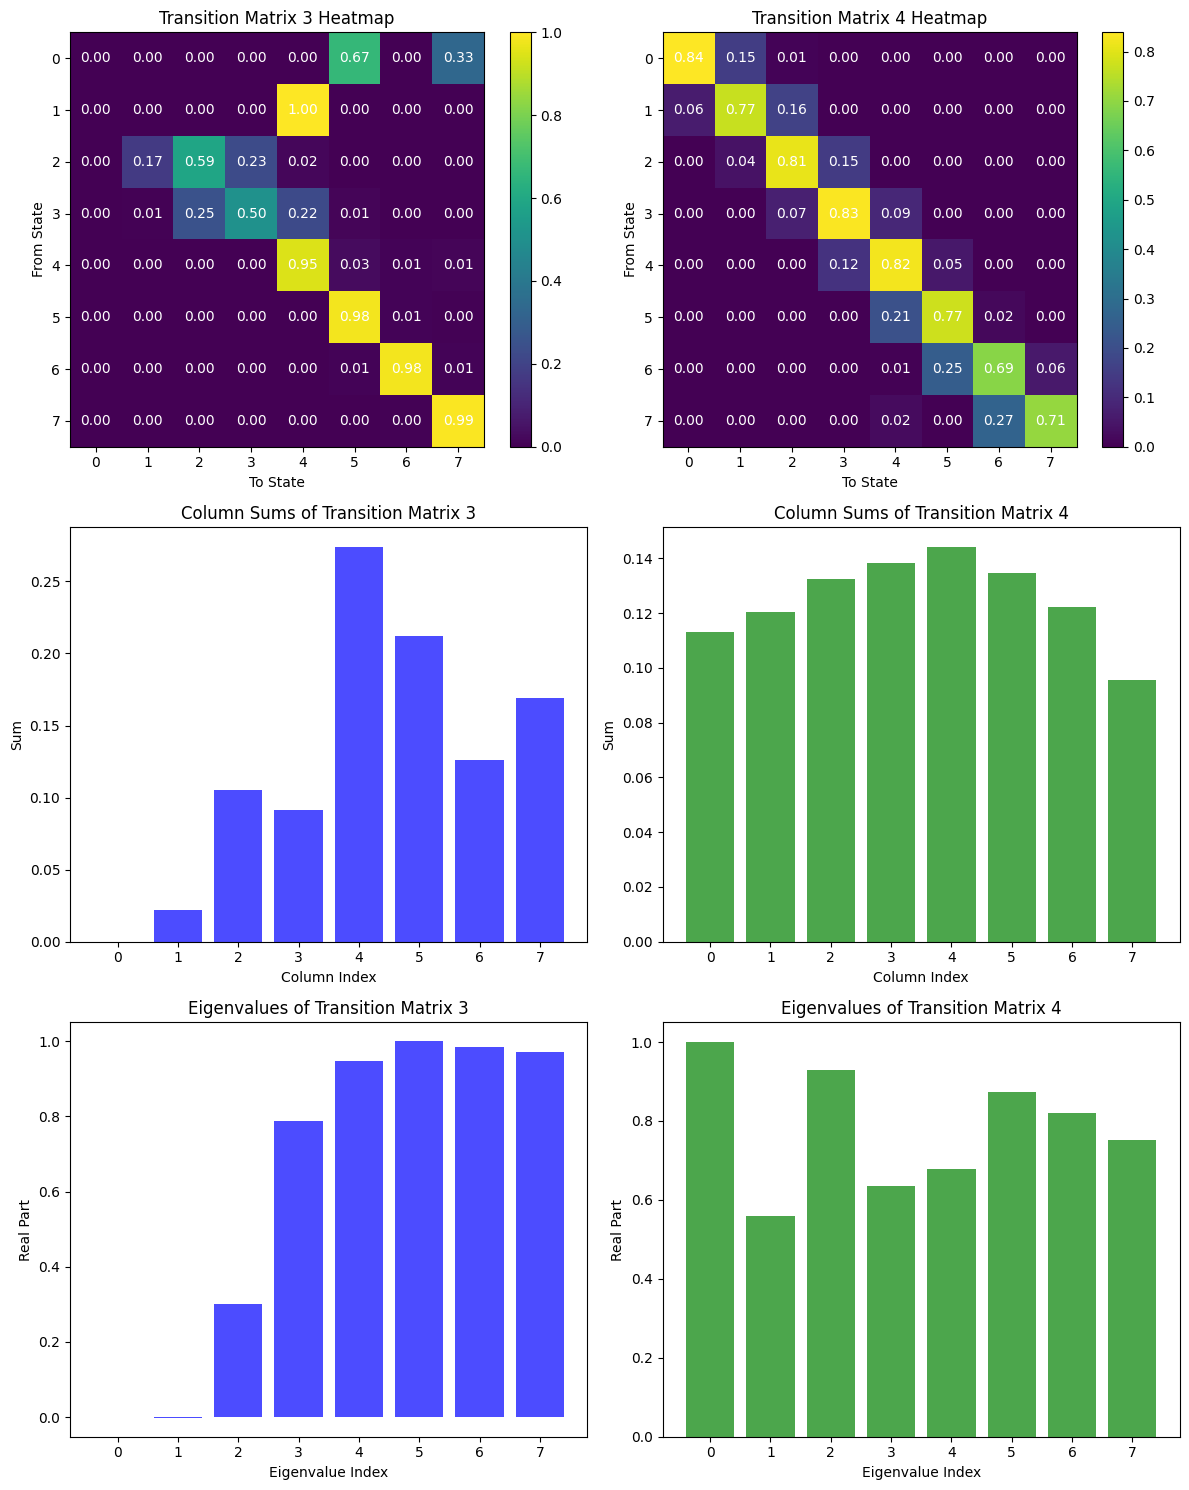

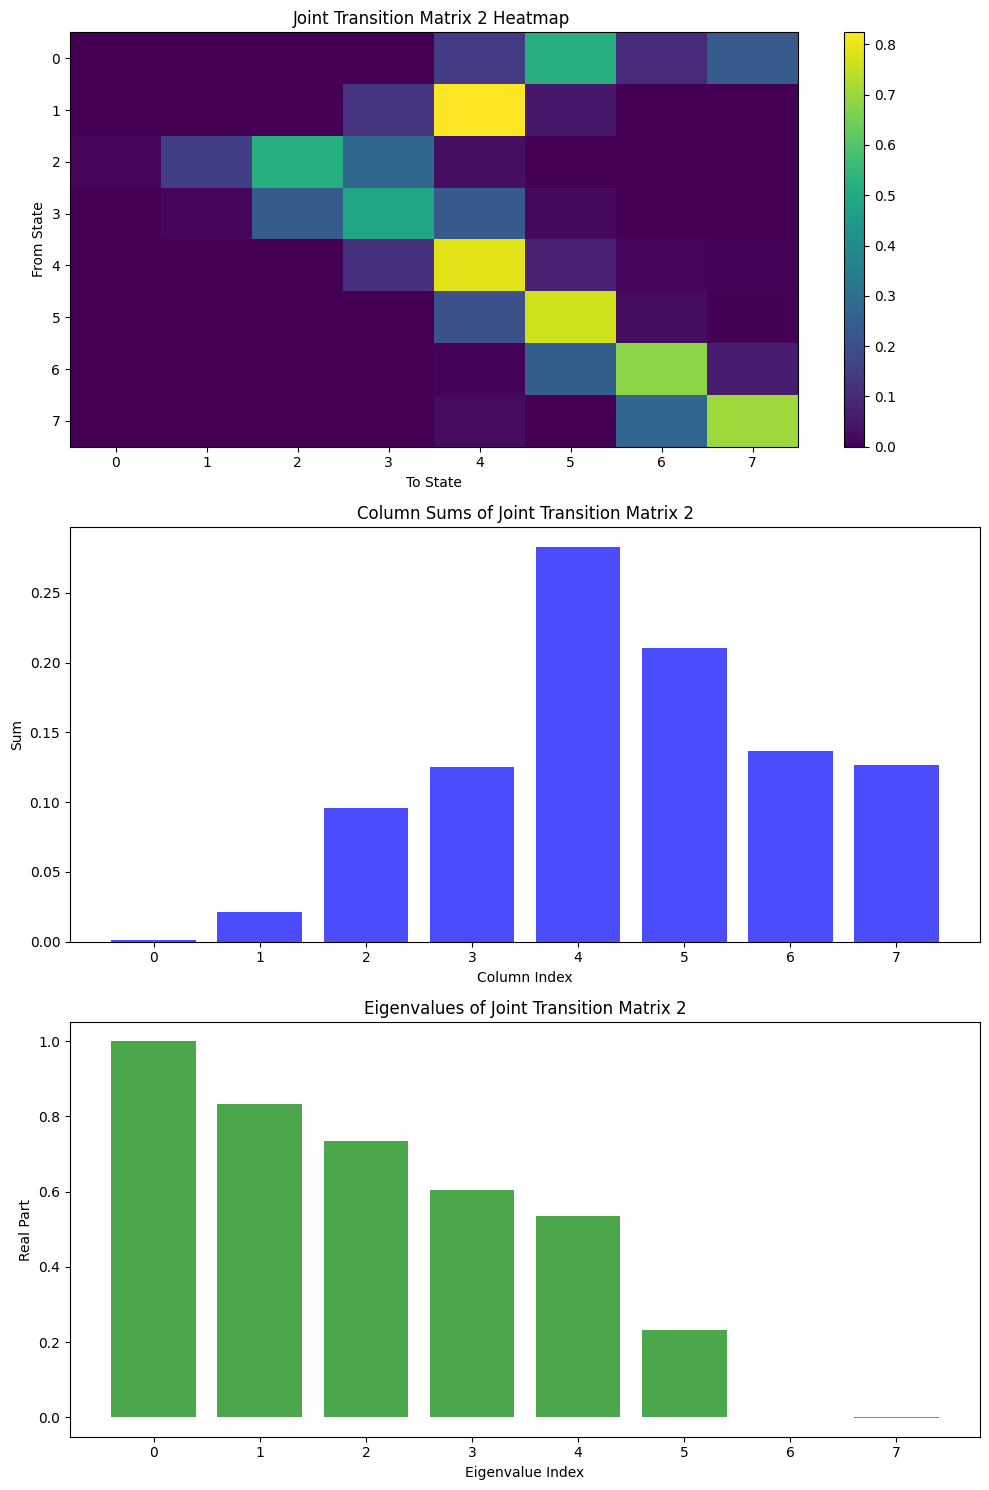

In [10]:

if __name__ == "__main__":
    join_matrixSecondCase = secondPair()[2]

    

## processing the conditional matrix between bot joint matrices 

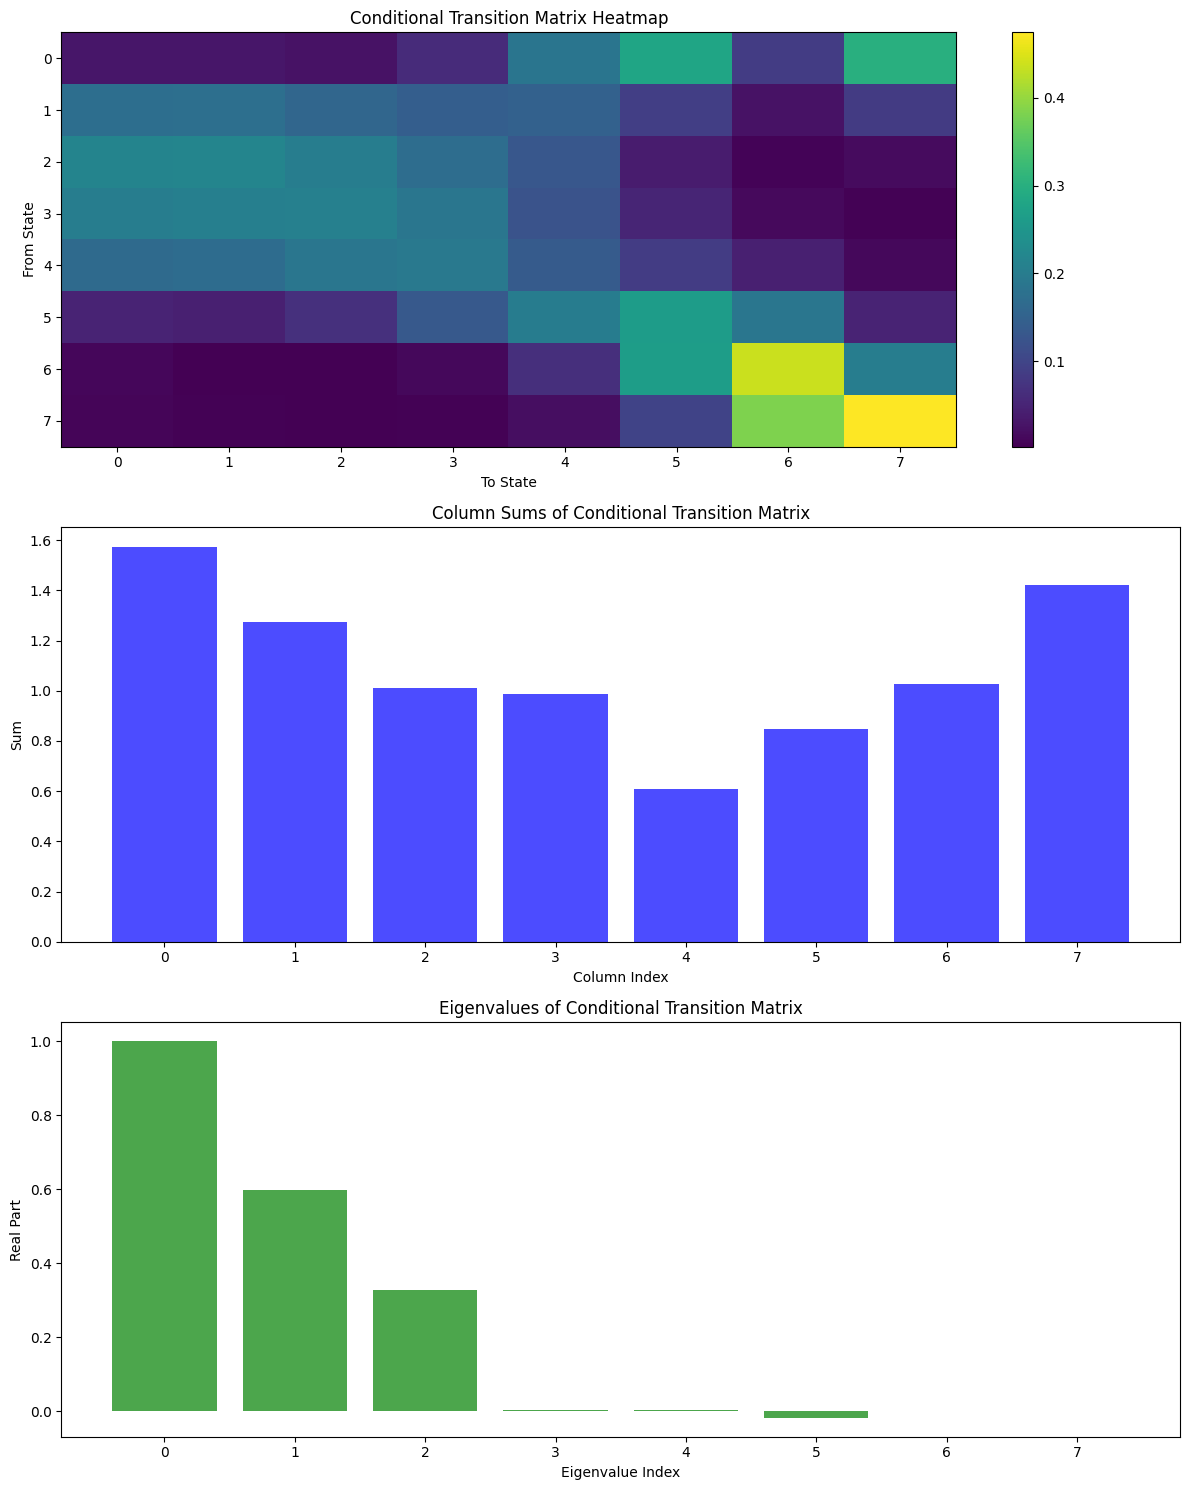

In [22]:

################################################################################
#### compute the conditional transition matrix between bot joint matrices
################################################################################

#compute the conditional from P(A|B) = P(A and B)/P(B) , donde A es mi primer par de series y b mi segundo par de matrices 

# Compute the conditional transition matrix
conditional_matrix = np.dot(join_matrixFirstCase,join_matrixSecondCase)
pb = np.sum(conditional_matrix, axis = 0, keepdims= True) # Sumar columnas para obtener P(B) 
conditional_matrix  = conditional_matrix/ pb   # Element-wise product
conditional_matrix /= conditional_matrix.sum(axis=1, keepdims=True)  # Normalize rows to sum to 1

# Compute column sums for the conditional matrix
column_sums_conditional = conditional_matrix.sum(axis=0)

# Compute eigenvalues for the conditional matrix
eigenvalues_conditional = np.linalg.eigvals(conditional_matrix)

# Plot heatmap, column sums, and eigenvalues for the conditional matrix
fig, axes = plt.subplots(3, 1, figsize=(12, 15))  # 3 rows, 1 column

# Heatmap for Conditional Transition Matrix
im = axes[0].imshow(conditional_matrix, cmap="viridis", aspect="auto")
axes[0].set_title("Conditional Transition Matrix Heatmap")
fig.colorbar(im, ax=axes[0])
axes[0].set_xlabel("To State")
axes[0].set_ylabel("From State")

# Calcular la suma promedio de las columnas de ambas matrices conjuntas
average_column_sums = (join_matrixFirstCase.sum(axis=0) + join_matrixSecondCase.sum(axis=0)) / 2

# Bar plot for Column Sums of Conditional Transition Matrix
axes[1].bar(range(N), column_sums_conditional / average_column_sums, color="blue", alpha=0.7)
axes[1].set_title("Column Sums of Conditional Transition Matrix")
axes[1].set_xlabel("Column Index")
axes[1].set_ylabel("Sum")

# Bar plot for Eigenvalues of Conditional Transition Matrix
axes[2].bar(range(len(eigenvalues_conditional)), eigenvalues_conditional.real, color="green", alpha=0.7)
axes[2].set_title("Eigenvalues of Conditional Transition Matrix")
axes[2].set_xlabel("Eigenvalue Index")
axes[2].set_ylabel("Real Part")

plt.tight_layout()
plt.show()


## making on it on torch :


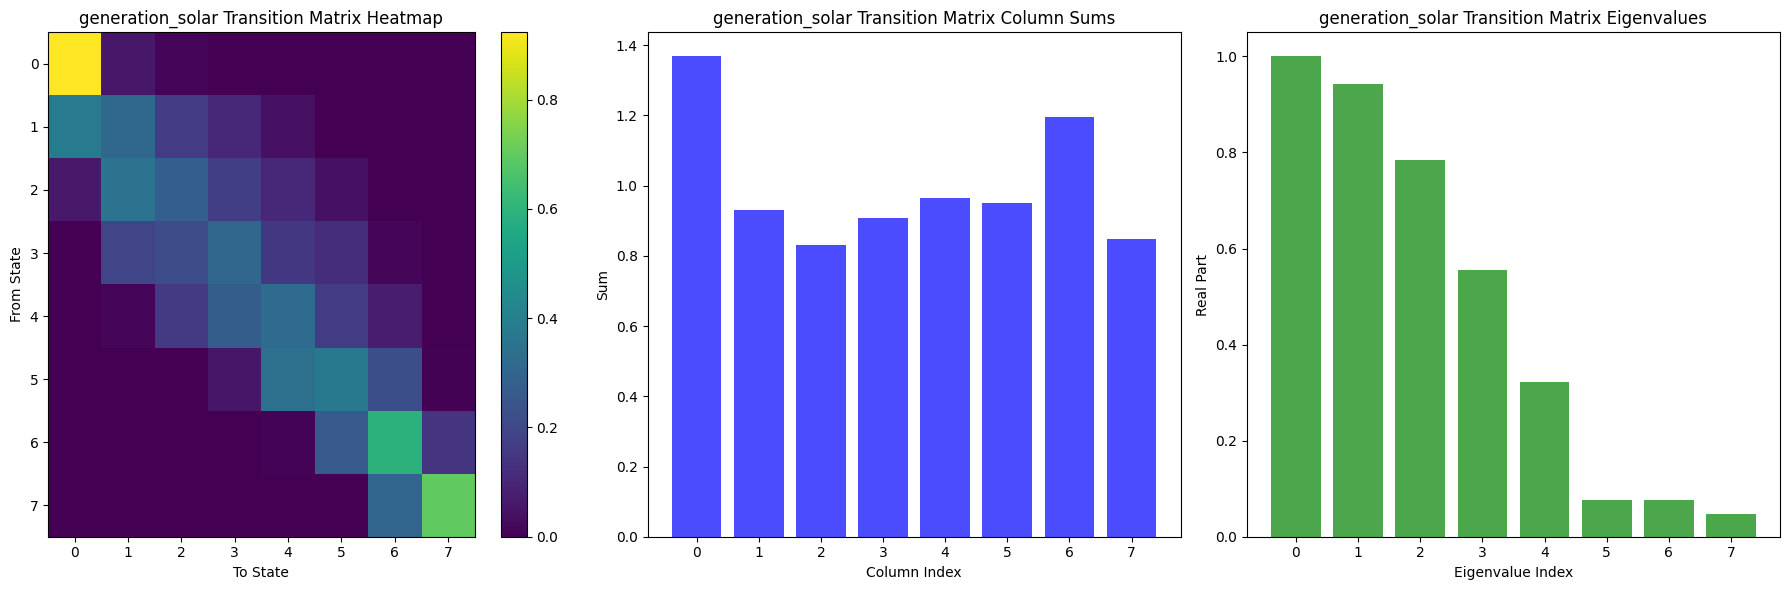

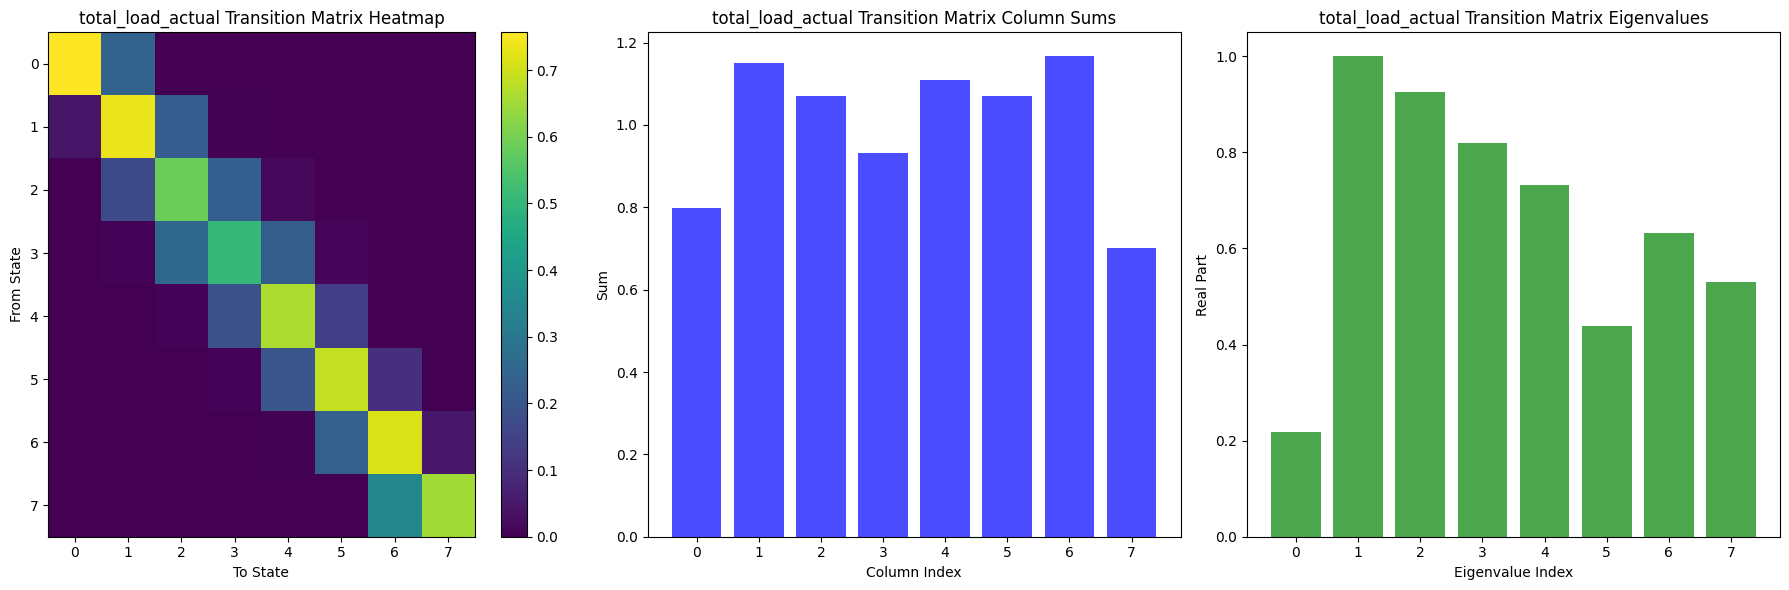

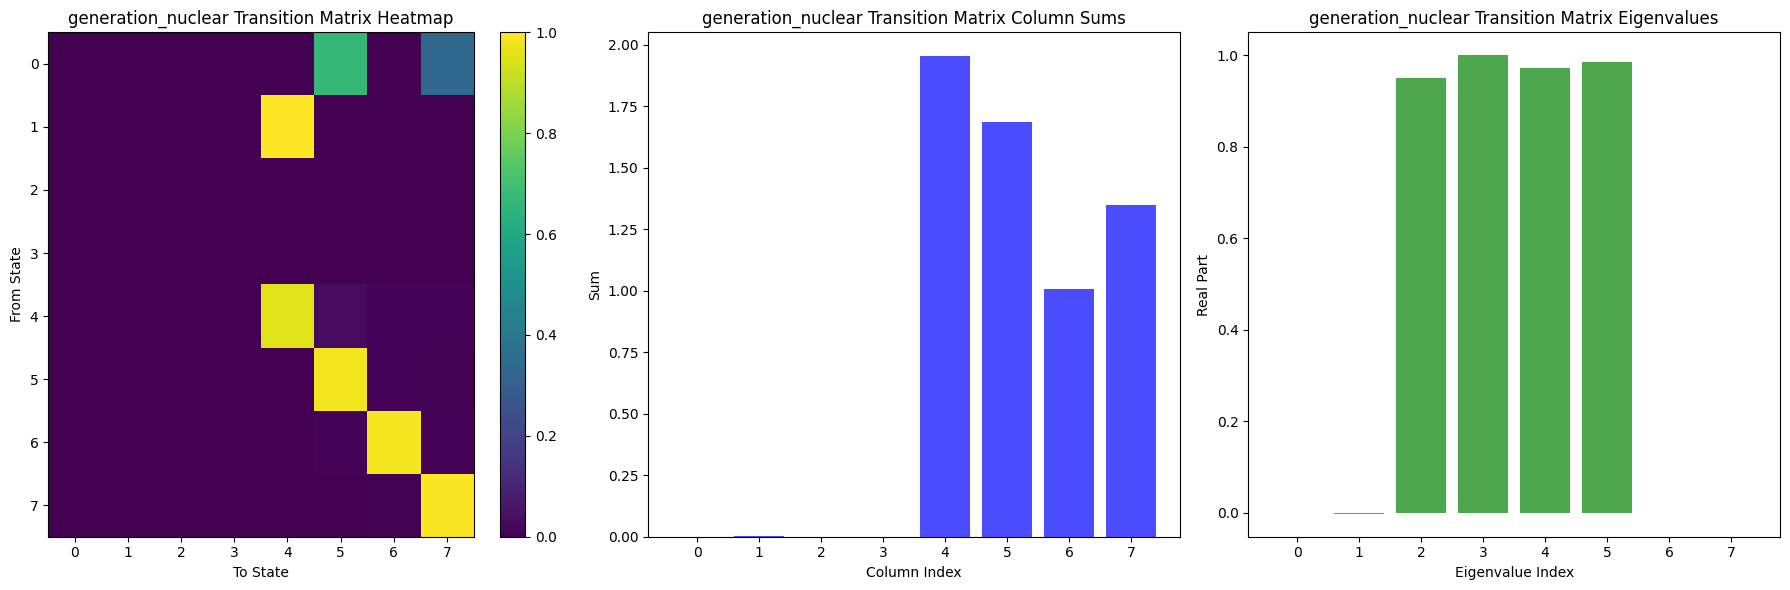

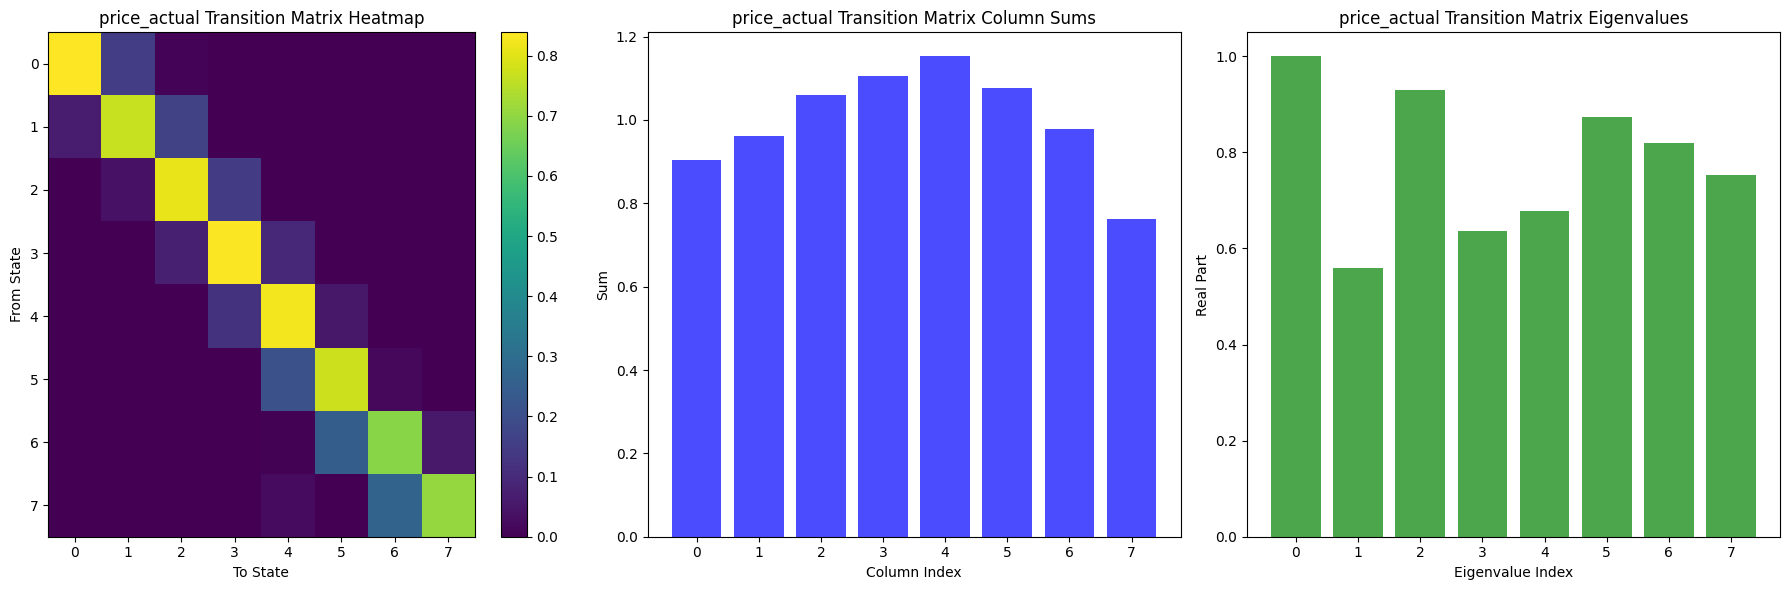

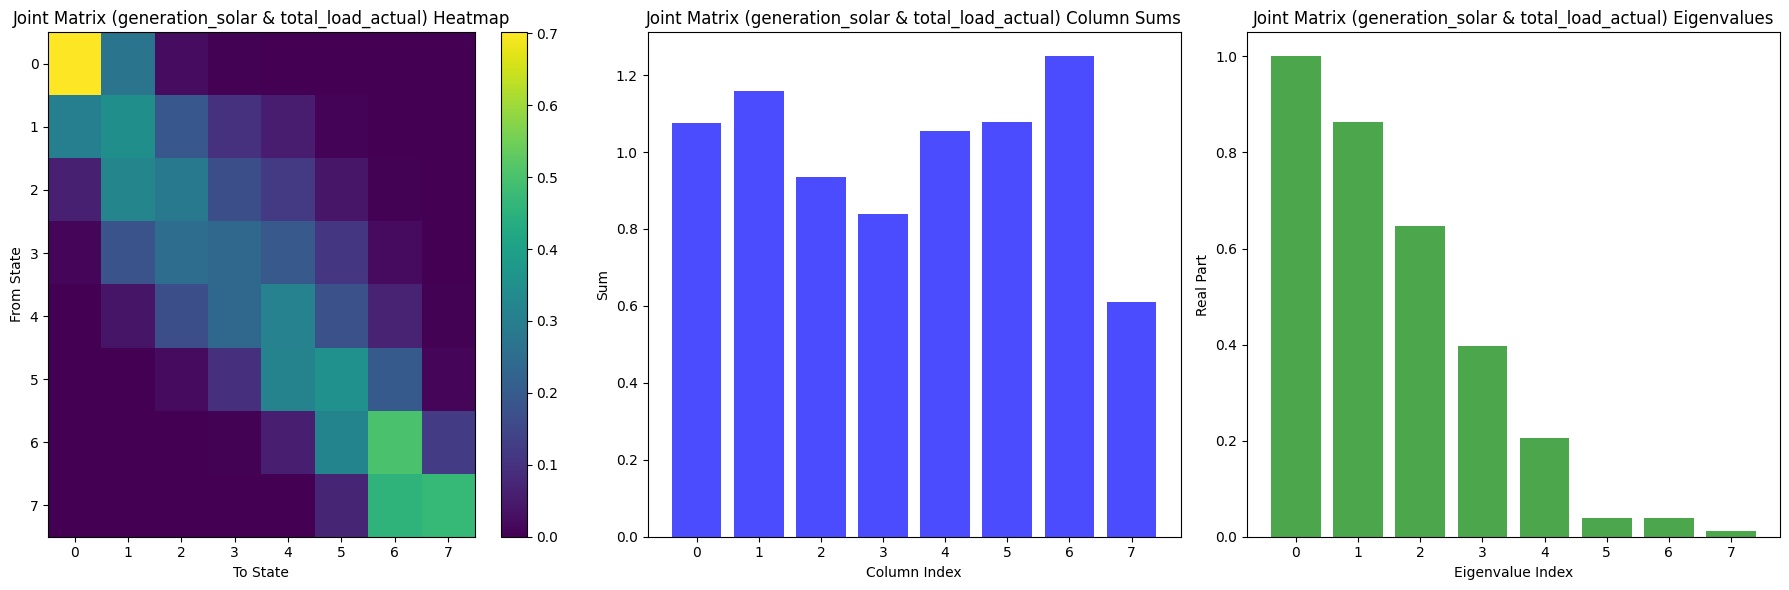

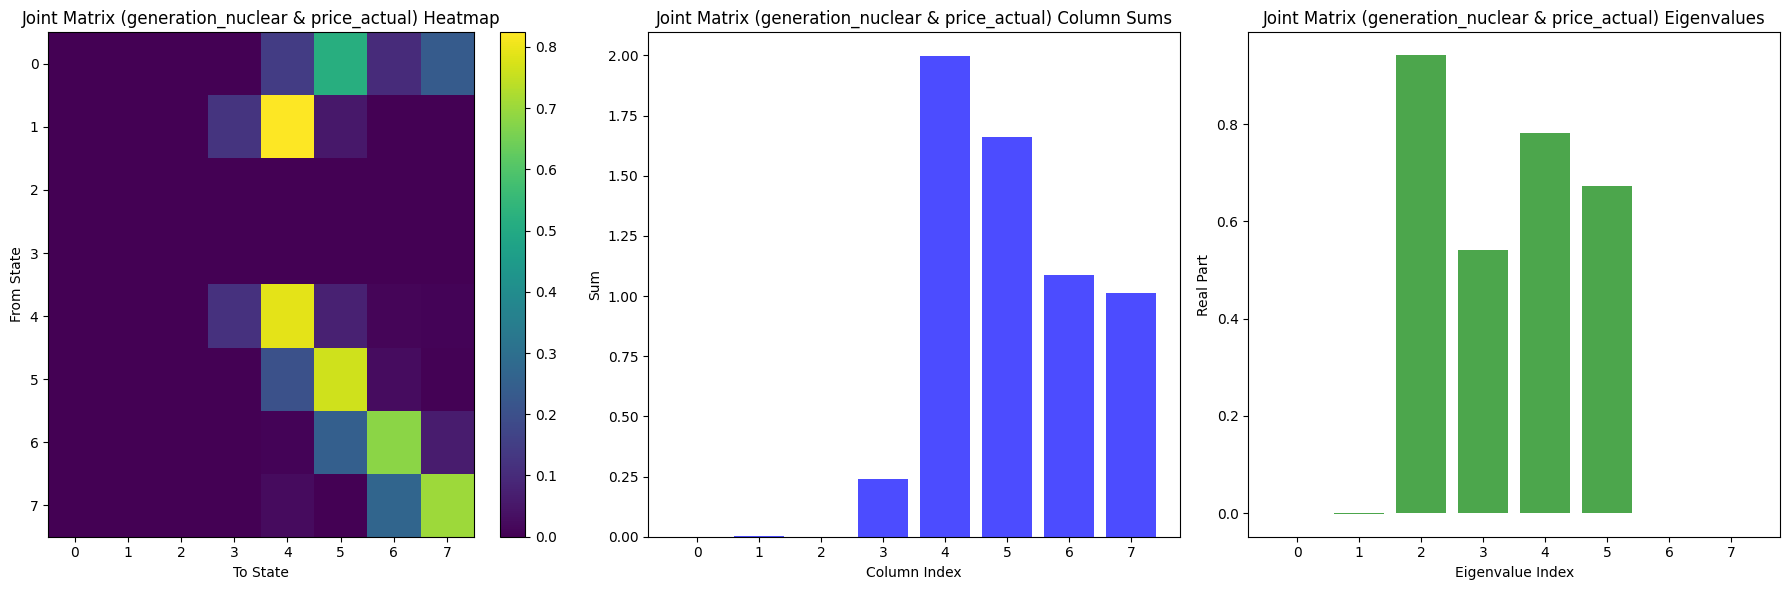

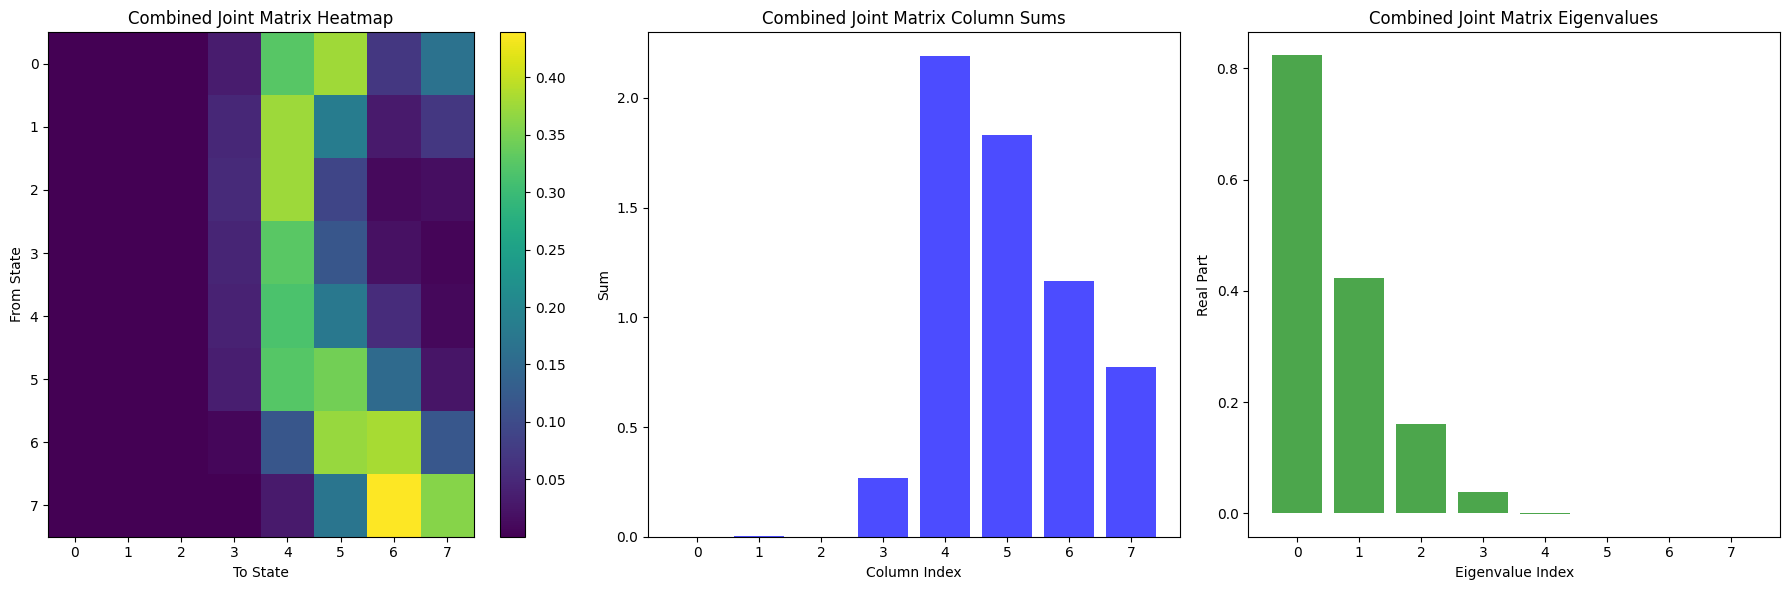

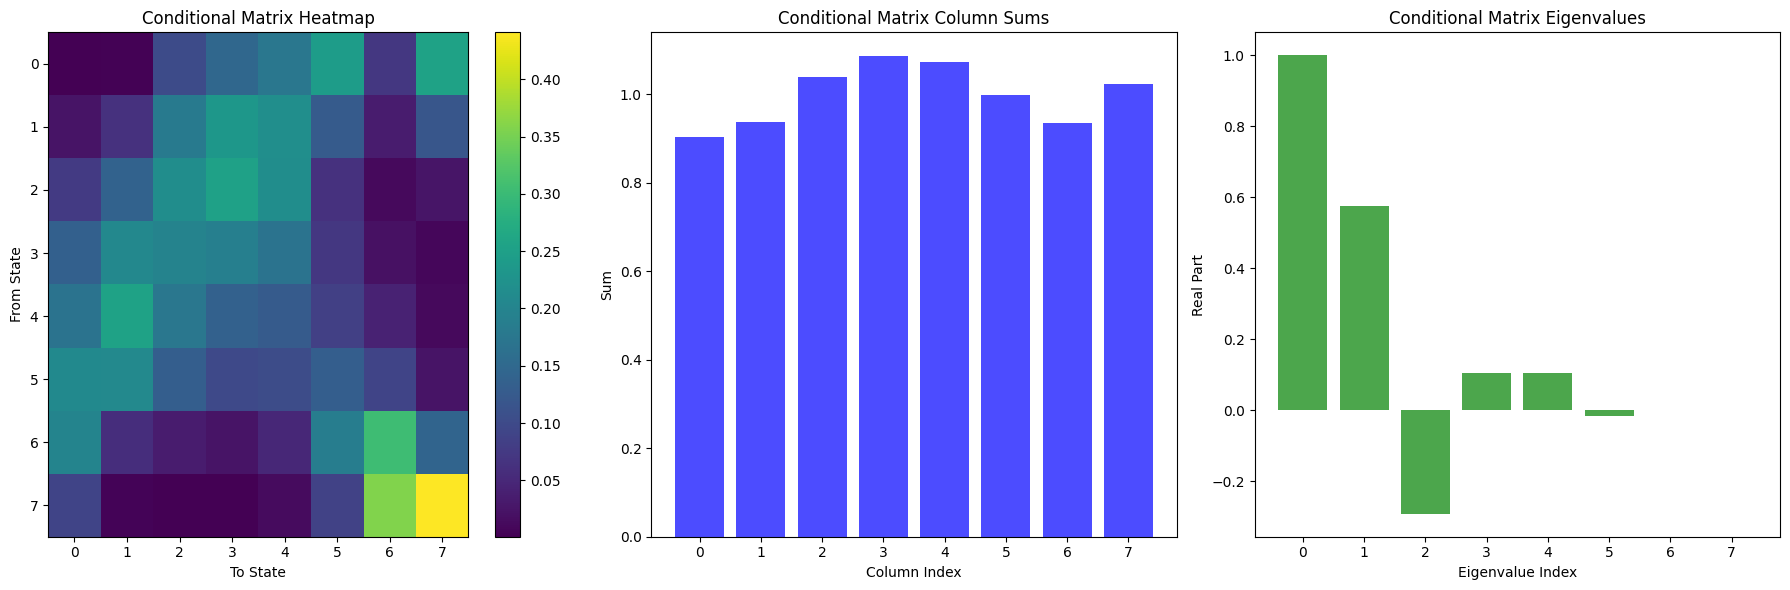

In [27]:
import torch
import matplotlib.pyplot as plt
import pandas as pd

def load_energy_data():
    """
    Carga los datos de energía desde un archivo CSV.
    """
    df = pd.read_csv("dataset/energy_dataset.csv")
    data = {
        'generation_solar': df['generation solar'].dropna().values,
        'generation_nuclear': df['generation nuclear'].dropna().values,
        'price_actual': df['price actual'].dropna().values,
        'total_load_actual': df['total load actual'].dropna().values
    }
    return data

def create_transition_matrix(series, num_states, device='cpu'):
    """
    Crea una matriz de transición basada en una serie temporal.
    """
    series = torch.tensor(series, device=device)
    bins = torch.linspace(series.min(), series.max(), num_states + 1, device=device)
    states = torch.bucketize(series, bins) - 1  # Asigna estados
    states = torch.clamp(states, 0, num_states - 1)  # Asegura que los índices estén en el rango válido

    trans_matrix = torch.zeros((num_states, num_states), device=device)

    for i in range(len(states) - 1):
        trans_matrix[states[i], states[i + 1]] += 1

    # Normaliza filas y evita divisiones por cero
    row_sums = trans_matrix.sum(dim=1, keepdim=True)
    row_sums[row_sums == 0] = 1  # Evita divisiones por cero
    trans_matrix /= row_sums
    return trans_matrix

def compute_conditional_matrix_from_joint(joint_matrix1, joint_matrix2):
    """
    Calcula la matriz condicional P(A|B) = P(A and B) / P(B).
    """
    # Producto matricial entre las dos matrices conjuntas
    conditional_matrix = torch.mm(joint_matrix1, joint_matrix2)

    # Calcular P(B) como la suma de columnas
    pb = conditional_matrix.sum(dim=0, keepdim=True)

    # Dividir cada elemento de la matriz por P(B)
    conditional_matrix /= pb

    # Normalizar filas para que sumen 1
    row_sums = conditional_matrix.sum(dim=1, keepdim=True)
    row_sums[row_sums == 0] = 1  # Evita divisiones por cero
    conditional_matrix /= row_sums

    return conditional_matrix

def plot_matrix_with_details(matrix, title, num_states):
    """
    Dibuja un heatmap, un gráfico de barras para las sumas de columnas
    y un gráfico de barras para los eigenvalues de una matriz.
    """
    column_sums = matrix.sum(dim=0)
    eigenvalues = torch.linalg.eigvals(matrix).real

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Heatmap de la matriz
    im = axes[0].imshow(matrix.cpu().numpy(), cmap="viridis", aspect="auto")
    axes[0].set_title(f"{title} Heatmap")
    axes[0].set_xlabel("To State")
    axes[0].set_ylabel("From State")
    fig.colorbar(im, ax=axes[0])

    # Gráfico de barras para las sumas de columnas
    axes[1].bar(range(num_states), column_sums.cpu().numpy(), color="blue", alpha=0.7)
    axes[1].set_title(f"{title} Column Sums")
    axes[1].set_xlabel("Column Index")
    axes[1].set_ylabel("Sum")

    # Gráfico de barras para los eigenvalues
    axes[2].bar(range(len(eigenvalues)), eigenvalues.cpu().numpy(), color="green", alpha=0.7)
    axes[2].set_title(f"{title} Eigenvalues")
    axes[2].set_xlabel("Eigenvalue Index")
    axes[2].set_ylabel("Real Part")

    plt.tight_layout()
    plt.show()

def main():
    # Configuración
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    num_states = 8

    # Cargar datos
    data = load_energy_data()
    series_names = ['generation_solar', 'total_load_actual', 'generation_nuclear', 'price_actual']

    # Crear matrices de transición para cada serie
    transition_matrices = {}
    for name in series_names:
        matrix = create_transition_matrix(data[name], num_states, device)
        transition_matrices[name] = matrix

        # Visualizar matriz de transición
        plot_matrix_with_details(matrix, f"{name} Transition Matrix", num_states)

    # Calcular matrices conjuntas
    joint_pairs = [('generation_solar', 'total_load_actual'),
                   ('generation_nuclear', 'price_actual')]

    joint_matrices = {}
    for pair in joint_pairs:
        matrix1 = transition_matrices[pair[0]]
        matrix2 = transition_matrices[pair[1]]
        joint_matrix = torch.mm(matrix1, matrix2)
        joint_matrices[pair] = joint_matrix

        # Visualizar matriz conjunta
        plot_matrix_with_details(joint_matrix, f"Joint Matrix ({pair[0]} & {pair[1]})", num_states)

    # Calcular la matriz conjunta de las conjuntas
    joint_matrix1 = joint_matrices[('generation_solar', 'total_load_actual')]
    joint_matrix2 = joint_matrices[('generation_nuclear', 'price_actual')]

    combined_joint_matrix = torch.mm(joint_matrix1, joint_matrix2)
    plot_matrix_with_details(combined_joint_matrix, "Combined Joint Matrix", num_states)

    # Calcular la matriz condicional
    conditional_matrix = compute_conditional_matrix_from_joint(joint_matrix1, joint_matrix2)
    plot_matrix_with_details(conditional_matrix, "Conditional Matrix", num_states)

if __name__ == "__main__":
    main()

END